
# Climate Weather AI/ML Model - Aardvark Weather


## Cluster Access
1. [Create an NCI account ](https://my.nci.org.au/mancini)using **institution email**
2. Join below NCI projects
    - [vp91:NCI Training Project](https://aus01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fmy.nci.org.au%2Fmancini%2Fproject%2Fvp91&data=05%7C02%7CZhuochen.Wu%40anu.edu.au%7Cf5a89cc20ce54084a5a408dda23d8170%7Ce37d725cab5c46249ae5f0533e486437%7C0%7C0%7C638845107242745767%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=U5QIrogOxO%2FbxR8Y7FGaB8tA1hzCGOzqP4QiFiqv5XU%3D&reserved=0)
    - [dk92: for environment modules and some examples](https://my.nci.org.au/mancini/project/dk92/join)
    - [wb00: for NCI-WeatherBench and ClimateNet datasets](https://my.nci.org.au/mancini/project/wb00/join)
    - [rt52: for ERA5 datasets](https://my.nci.org.au/mancini/project/rt52/join)
    - [ob53: for BARRA2 datasets](https://my.nci.org.au/mancini/project/ob53/join)
    
## Run the tested notebook
1. Go to [ARE site](are.nci.org.au), follow instructions on *[Run Jupyter Notebooks on Gadi](../Getting-Started/use-jupyterlab.qmd)* page    
2. Fill out the JupyterLab request form:  
 - **Walltime (hours)**: `1`
 - **Queue**: `gpuvolta`
 - **Compute Size**: `1gpu`
 - **Project**: `<xy01>`
 - **Storage**: `gdata/dk92+scratch/<xy01>`
3. Click ***Advanced options*** and fill in the following fields:  
 - **Module directories**: `/g/data/dk92/apps/Modules/modulefiles/`  
 - **Modules**: `NCI-ai-ml/25.07`  
 - **Jobfs size**: `10GB`    
4. Launch the session to run the tested notebook  

## Note on the tested notebook
copy the tested notebook from any/all of the following path to your own working directory. If your working directory is different from "/scratch/<xy01>", remember to change the storage directive in the JupyterLab request form.
```bash
/g/data/dk92/notebooks/examples-aiml/aardvark-weather/data_demo.ipynb
/g/data/dk92/notebooks/examples-aiml/aardvark-weather/forecast_demo.ipynb
/g/data/dk92/notebooks/examples-aiml/aardvark-weather/e2e_finetune_demo.ipynb
/g/data/dk92/notebooks/examples-aiml/aardvark-weather/train_encoder.ipynb
```
- all the notebooks are using the original datasets released with the Aardvark-Weather paper[1] in its huggingface record[3]. 
- To run inference only, the dataset is downloaded to `/g/data/dk92/data/aardvark-weather/sample_data`. 
- To train the encoder, user has to do the data transformation from the training dataset `/g/data/dk92/data/aardvark-weather/training_data` since the default data loader doesn't read directly from the netcdf files in the training datasets. The transformed data requires approximately 200GiB disk space. If you need help to do the data transformation, please get in touch through NCI help desk.
- the original four checkpoints, for the encoder, processor, decoder and the end-to-end model, were downloaded from the huggingface record[3] and hosted in `g/data/dk92/data/aardvark-weather/trained_model`.

## Aardvark Weather
Aardvark Weather is an end-to-end data-driven model for weather prediction. Unlike most of its data-driven forecasting model peers, it directly maps past observations to future forecasts. The architecture consists of three components: an encoder, a processor, and a decoder. The encoder ingests raw observations to estimate the gridded initial state of the atmosphere. The processor then advances the estimated atmospheric state in time. Finally, the decoder generates the prediction at the point of interest based on the gridded state forecast. Each component was initially trained independently. The encoder was trained on level 1B or 1C satellite data (ASCAT, AMSU-A & B, HIRS, IASI, GRIDSAT) and in-situ records (HadISD, ICOADS, IGRA). The processor was trained on 1.5° regridded ERA5 dataset utilising surface variables (t2m, u10, v10, mslp) and pressure level variables (q, z, t, u, v) at level 200, 500, 700, and 850 hPa. The decoder was trained on HadISD station data using near-surface temperature (t2m) and wind speed (ws). Once these blocks were individually trained, they were chained in sequence and fine-tuning into the end-to-end model.   

In the paper [1] , the authors systematically benchmark Aardvark Weather and demonstrate its potential to replace the full numerical weather prediction (NWP) pipeline.  

For global gridded forecasts, Aardvark achieves latitude-weighed RMSE comparable to the Integrated Forecasting System (IFS) in its high resolution configuration (HRES) from the European Centre for Medium-Range Weather Forecasts (ECMWF) and Global Forecast System (GFS) from the National Centers for Environmental Prediction, across variables including t2m, u10, v10, mslp, t850, u700, and q700 at lead time up to 10 days. Spatially, the model successfully reproduces the large-scale atmospheric state features in both the mid-latitude and the tropics.  

For station forecasting, Aardvark delivers global mean absolute error (MAE) on par with the station-corrected HRES for temperatures predictions up to 10 days  and for wind speed up to 6 days.  Notably, in resource-limited areas such as West Africa and the Pacific, Aardvark consistently out-performed the station-corrected IFS-HRES across all lead times.  

At NCI, we configured the NCI-ai-ml environment compatible to support Aardvark Weather [2], enabling researchers to explore its datasets, and building its training and inference pipelines on Gadi. To assist users, four Jupyter notebooks have been developed, showcasing the satellite and synoptic observation datasets[3], model training workflow, and forecast evaluation procedures.  

Reference:  
1. Allen, A., Markou, S., Tebbutt, W. et al. (2025). End-to-end data-driven weather prediction. Nature, 641, 1172–1179. https://doi.org/10.1038/s41586-025-08897-0  

2. Allen, A. (2025). aardvark-weather-public [Software]. GitHub. https://github.com/anna-allen/aardvark-weather-public  

3. Aardvark Weather Observational Dataset, av555/aardvark-weather, Hugging Face, doi:10.57967/hf/4274, https://huggingface.co/datasets/av555/aardvark-weather”  

# Dataset Demo

**Notes from NCI**: This notebook is originally from [aardvark-weather-public](https://github.com/anna-allen/aardvark-weather-public/blob/main/notebooks/data_demo.ipynb) repository. We adapt it to facilitate NCI users to run it on Gadi. The visualization of GRIDSAT is added for the completeness. It uses the netcdf file from the training datasets provided by the author in the [huggingface instance av555/aardvark-weather](https://huggingface.co/datasets/av555/aardvark-weather/tree/main/training_data).

This notebook provides an example of the data utilised to generate a forecast using Aardvark Weather. We explore a single timeslice containing all the observations required to generate a forecast. This sample data is the output of the loader `WeatherDatasetE2E` in `../aardvark/loaders.py`.

In [1]:
!module list

Currently Loaded Modulefiles:
 1) openmpi/4.1.5   2) singularity   3) NCI-ai-ml/25.07   4) pbs  
>

In [2]:
import numpy as np
import xarray as xr
import pickle

In [3]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
ddir = "/g/data/dk92/data/aardvark-weather"

## Data
Open a sample of data required to produce a forecast.

In [4]:
with open(f"{ddir}/sample_data/sample_data_final.pkl", 'rb') as fp:
    data = pickle.load(fp)

In [5]:
[ ki for ki in data["assimilation"].keys() if "_x_current" in ki]

['sat_x_current',
 'icoads_x_current',
 'igra_x_current',
 'amsua_x_current',
 'amsub_x_current',
 'iasi_x_current',
 'ascat_x_current',
 'hirs_x_current',
 'era5_x_current']

Multiple different datasets are utilised as input to create a forecast, each with multiple channels including observations and metadata. Example channels for each of these are plotted below. The plot_channel variable in each cell can be adjusted to visualise different channels. 

## Satellite
First visualise the satellite data from HIRS, AMSU-A, AMSU-B, IASI and ASCAT

In [6]:
# Set up longitude and latitude for plotting
lon = np.linspace(0,359,360)
lat = np.linspace(90,-90,181)

lon_1p5 = np.linspace(0,359,240)
lat_1p5 = np.linspace(90,-90,121)

### HIRS

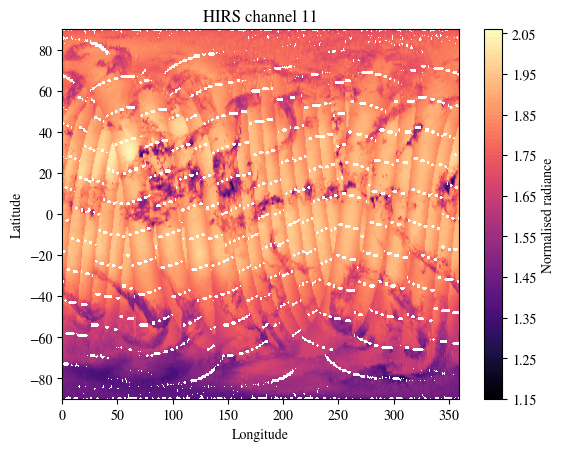

In [7]:
fig = plt.figure()
plot_channel = 11
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["hirs_current"][0,...,plot_channel].cpu().T, 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"HIRS channel {plot_channel}")
plt.show()

### AMSU-A

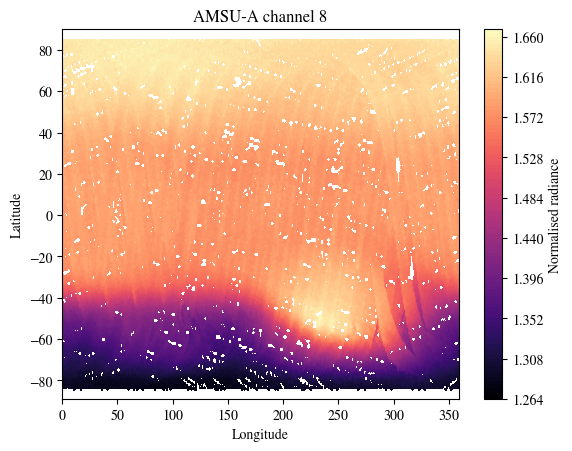

In [8]:
fig = plt.figure()
plot_channel = 8
p = plt.contourf(
    lon, 
    lat[:-1],
    data["assimilation"]["amsua_current"][0,...,plot_channel].cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"AMSU-A channel {plot_channel}")
plt.show()

### AMSU-B

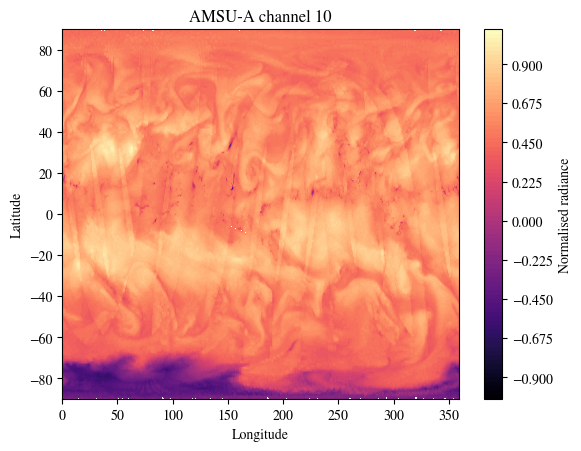

In [9]:
fig = plt.figure()
plot_channel = 10
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["amsub_current"][0,...,plot_channel].T.cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"AMSU-A channel {plot_channel}")
plt.show()

### IASI

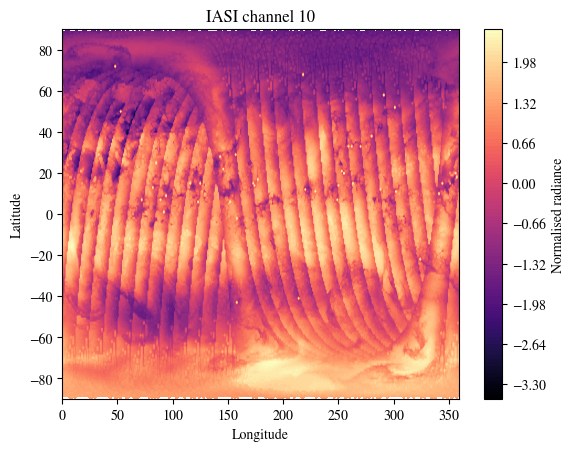

In [10]:
fig = plt.figure()
plot_channel = 10
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["iasi_current"][0,...,plot_channel].T.cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"IASI channel {plot_channel}")
plt.show()

### ASCAT

There are 17 channels in this dataset.
Plotting channel 5.
Modify plot_channel to any integer between 0 and 16 to inspect other channels.


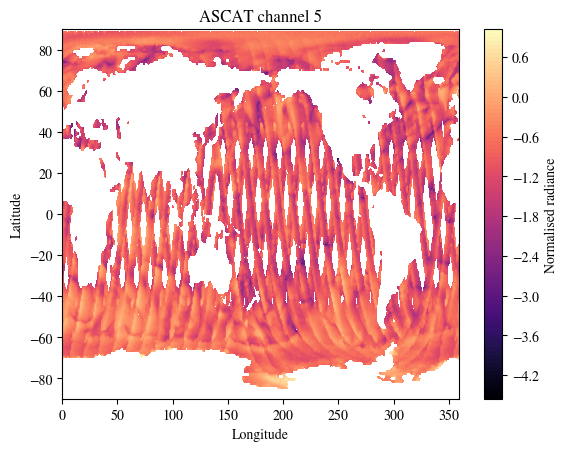

In [11]:
print(f"There are {data['assimilation']['ascat_current'].shape[-1]} channels in this dataset.\nPlotting channel 5.\nModify plot_channel to any integer between 0 and 16 to inspect other channels.")

fig = plt.figure()
plot_channel = 5
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["ascat_current"][0,...,plot_channel].T.cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"ASCAT channel {plot_channel}")
plt.show()

## GRIDSAT
**NOTE from NCI**: Two channels of GRIDSAT dataset are also used in training of Aardvark Weather.

In [12]:
nc_file = f"{ddir}/training_data/gridsat_data_v1.nc"  
nc = xr.open_dataset(nc_file)
nc

<xarray.Dataset> Size: 4GB
Dimensions:       (time: 4746, latitude: 200, longitude: 514)
Coordinates:
  * time          (time) datetime64[ns] 38kB 2007-01-02 ... 2019-12-30
  * longitude     (longitude) float32 2kB 0.215 0.915 1.615 ... 358.8 359.5
  * latitude      (latitude) float32 800B -69.68 -68.99 -68.28 ... 68.92 69.61
Data variables:
    gridsat_6p7   (time, latitude, longitude) float32 2GB ...
    gridsat_10p3  (time, latitude, longitude) float32 2GB ...

There are 2 channels in this dataset.
Plotting channel `gridsat_6p7`.
Modify the varname used in data_sat to inspect the other channel `gridsat_10p3`.


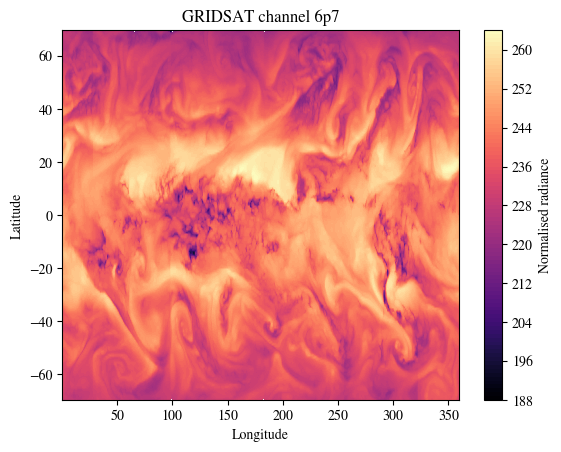

In [13]:
lat_sat =nc.latitude.values
lon_sat =nc.longitude.values
data_sat= nc["gridsat_6p7"].values

print(f"There are 2 channels in this dataset.\nPlotting channel `gridsat_6p7`.\nModify the varname used in data_sat to inspect the other channel `gridsat_10p3`.")

fig = plt.figure()
p = plt.contourf(
    lon_sat,
    lat_sat,
    data_sat[0,:], 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"GRIDSAT channel 6p7")
plt.show()

## SYNOPS
We next visualise the SYNOPS data from land stations, marine platforms and radiosonde profiles

### HadISD

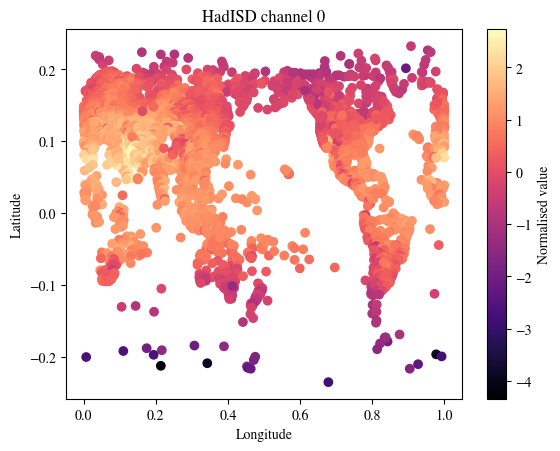

In [14]:
fig = plt.figure()
plot_channel = 0
p = plt.scatter(
    data["assimilation"]["x_context_hadisd_current"][plot_channel][0,0,:].cpu(),
    data["assimilation"]["x_context_hadisd_current"][plot_channel][0,1,:].cpu(),
    c = data["assimilation"]["y_context_hadisd_current"][plot_channel][0,:].cpu(), 
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised value') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"HadISD channel {plot_channel}")
plt.show()

### ICOADS

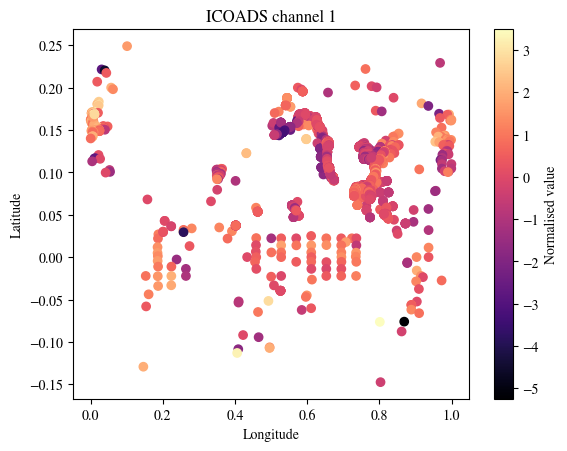

In [15]:
plot_channel = 1
fig = plt.figure()
p = plt.scatter(
    data["assimilation"]["icoads_x_current"][0][0,:].cpu(),
    data["assimilation"]["icoads_x_current"][1][0,:].cpu(),
    c = data["assimilation"]["icoads_current"][0,plot_channel,:].cpu(), 
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised value') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"ICOADS channel {plot_channel}")
plt.show()

### IGRA

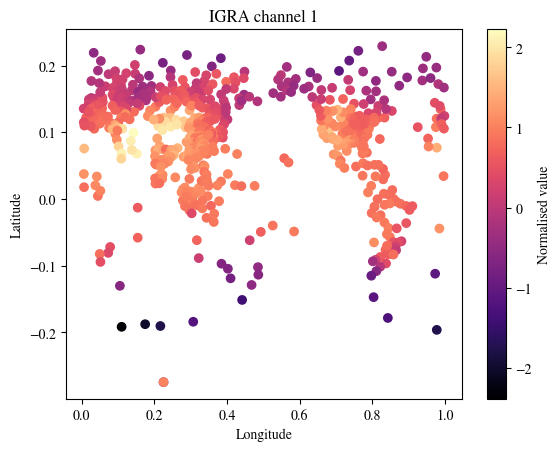

In [16]:
plot_channel = 1
fig = plt.figure()
p = plt.scatter(
    data["assimilation"]["igra_x_current"][0][0,:].cpu(),
    data["assimilation"]["igra_x_current"][1][0,:].cpu(),
    c = data["assimilation"]["igra_current"][0,plot_channel,:].cpu(), 
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised value') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"IGRA channel {plot_channel}")
plt.show()

# Forecast demo

**Notes from NCI**: This notebook is originally from [aardvark-weather-public](https://github.com/anna-allen/aardvark-weather-public/blob/main/notebooks/forecast_demo.ipynb) repository. We adapt it to facilitate NCI users to run it on Gadi. We fixed several issues in [the source code](https://github.com/anna-allen/aardvark-weather-public/blob/8fb35a0f5f7602eaf5127b9642c54eb052d68f56/aardvark/e2e_model.py#L161) to allow it running under torch 2.7.0.

Here we load the trained Aardvark Weather model and produce a global and station forecast using the sample data. 

In [ ]:
!module list

Currently Loaded Modulefiles:
 1) openmpi/4.1.5   2) singularity   3) NCI-ai-ml/25.07   4) pbs  
>

In [ ]:
import sys
wdir = "/g/data/dk92/notebooks/examples-aiml/aardvark-weather/aardvark-weather-public"
ddir = "/g/data/dk92/data/aardvark-weather"
sys.path.append(f"{wdir}/aardvark")

import pickle
import numpy as np
from e2e_model import *

import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"

Check a GPU is available

In [ ]:
import torch

if torch.cuda.is_available():
    print("GPU is available.")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    device="cuda"
else:
    print("GPU is not available, cannot produce forecast.")
    device="cpu"

GPU is available.
GPU name: Tesla V100-PCIE-32GB


## Generate predictions

Load the sample data (for a detailed analysis and visualisation of the contents of this dataset see data_demo.ipynb)

In [ ]:
with open(f"{ddir}/sample_data/sample_data_final.pkl", "rb") as fp:
    data = pickle.load(fp)

Load the model to generate predictions at one day leadtime. First select which varaible to generate station forecasts for.

In [ ]:
local_forecast_var = "tas"  # Model weights included for windspeed (ws) and 2tm (tas)

model = ConvCNPWeatherE2E(
    device=device,
    lead_time=1,
    se_model_path=f"{ddir}/trained_model/encoder",
    forecast_model_path=f"{ddir}/trained_model/processor",
    sf_model_path=f"{ddir}/trained_model/decoder/{local_forecast_var}/",
    return_gridded=True,
    aux_data_path=f"{ddir}/sample_data/",
)

Run the model to generate a forecast the sample data. This outputs the station forecast, gridded forevast and initial state

In [ ]:
station_forecast, global_forecast, initial_state = model(data)

after rMLP: torch.Size([1, 8719, 1])


In [ ]:
global_forecast.shape

torch.Size([1, 121, 240, 24])

In [ ]:
station_forecast.shape

torch.Size([1, 8719])

## Visualise model predictions

First look at the gridded forecasts. Visualise several variables

In [ ]:
vars = [
    "u10",
    "v10",
    "t2m",
    "mslp",
    "z200",
    "z500",
    "z700",
    "z850",
    "q200",
    "q500",
    "q700",
    "q850",
    "t200",
    "t500",
    "t700",
    "t850",
    "u200",
    "u500",
    "u700",
    "u850",
    "v200",
    "v500",
    "v700",
    "v850",
]

var_index_mapping = {k: v for v, k in enumerate(vars)}

In [ ]:
lon = np.linspace(0, 359, 240)
lat = np.linspace(-90, 90, 121)

Select the variable and data to plot. To plot another variable simply change the variable argument below. 

In [ ]:
variable = "u10"
var_index = var_index_mapping[variable]
initial_state_var = initial_state[0, ..., var_index].detach().cpu().numpy()
global_forecast_var = global_forecast[0, ..., var_index].detach().cpu().numpy()
colorscale_mag = np.max(np.abs(initial_state_var))

Plot the initial state

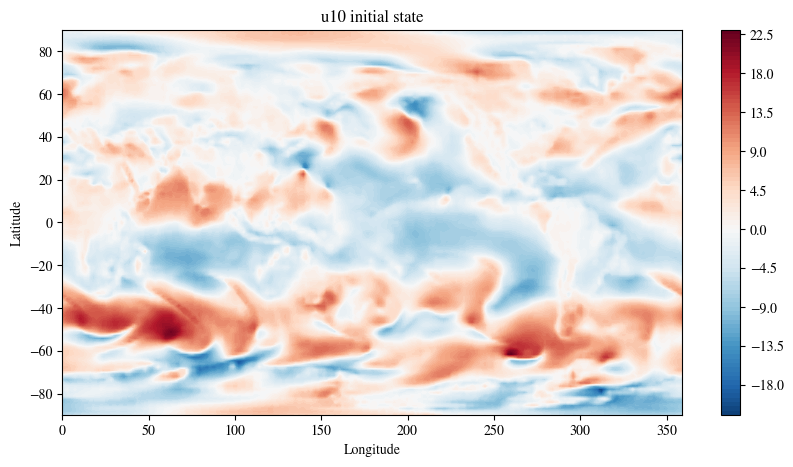

In [ ]:
fig = plt.figure(figsize=(10, 5))
plot_channel = 10
p = plt.contourf(
    lon,
    lat,
    initial_state_var,
    levels=100,
    vmax=colorscale_mag,
    vmin=-colorscale_mag,
    cmap="RdBu_r",
)
cbar = fig.colorbar(p)
# cbar.set_label('(m/s)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"{variable} initial state")
plt.show()

Plot the prediction at one day leadtime

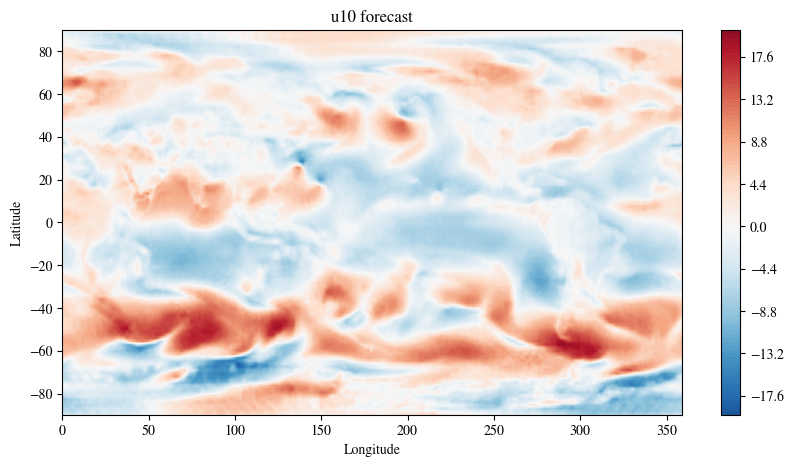

In [ ]:
fig = plt.figure(figsize=(10, 5))
plot_channel = 10
p = plt.contourf(
    lon,
    lat,
    global_forecast_var,
    levels=100,
    vmax=colorscale_mag,
    vmin=-colorscale_mag,
    cmap="RdBu_r",
)
cbar = fig.colorbar(p)
# cbar.set_label('(m/s)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"{variable} forecast")
plt.show()

The model also returns the station forecasts for T2M

In [ ]:
STATION_LON_LAT_SF = 360
HADISD_SCALING_FACTOR = 10
# Factors to unnormalise predictions
mean = np.load(f"{ddir}/sample_data/norm_factors/mean_hadisd_{local_forecast_var}.npy")
std = np.load(f"{ddir}/sample_data/norm_factors/std_hadisd_{local_forecast_var}.npy")

In [ ]:
station_forecast = (
    station_forecast.detach().cpu() * std + mean
) * HADISD_SCALING_FACTOR

/jobfs/151106967.gadi-pbs/ipykernel_405486/3168040627.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  station_forecast.detach().cpu() * std + mean


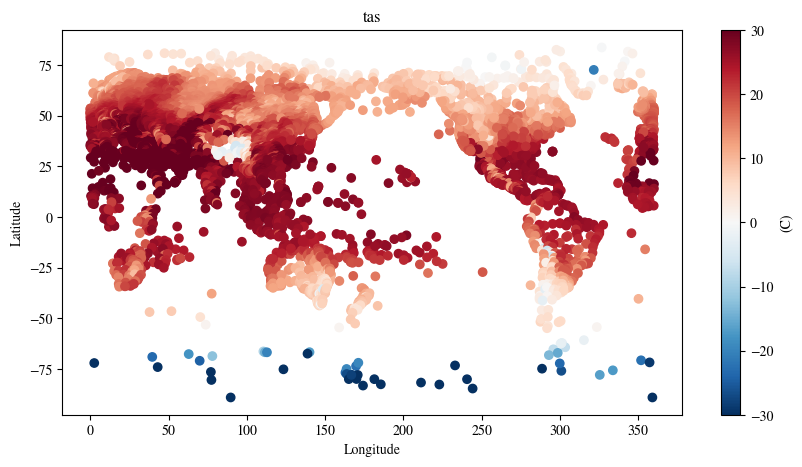

In [ ]:
fig = plt.figure(figsize=(10, 5))
plot_channel = 10
p = plt.scatter(
    data["downscaling"]["x_target"][0, 0, :].detach().cpu() * STATION_LON_LAT_SF,
    data["downscaling"]["x_target"][0, 1, :].detach().cpu() * STATION_LON_LAT_SF,
    c=station_forecast[0, :],
    vmax=30,
    vmin=-30,
    cmap="RdBu_r",
)
cbar = fig.colorbar(p)
cbar.set_label("(C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"{local_forecast_var}")
plt.show()

# End to end optimised forecast demo

**Notes from NCI**: This notebook is originally from [aardvark-weather-public](https://github.com/anna-allen/aardvark-weather-public/blob/main/notebooks/e2e_finetune_demo.ipynb) repository. We adapt it to facilitate NCI users to run it on Gadi. We fixed several issues in [the source code](https://github.com/anna-allen/aardvark-weather-public/blob/8fb35a0f5f7602eaf5127b9642c54eb052d68f56/aardvark/e2e_model.py#L161) to allow it running under torch 2.7.0. We also want to point out that it is not the purpose of this notebook to demonstrate how to finetune this end-to-end model. Instead, it shows how to use the fine-tuned end-to-end model to predict.

Here we load the trained Aardvark Weather model and produce end-to-end finetuned forecasts at one day lead time for temperature and windspeed. 

In [ ]:
!module list

Currently Loaded Modulefiles:
 1) openmpi/4.1.5   2) singularity   3) NCI-ai-ml/25.07   4) pbs  
>

In [ ]:
import sys
wdir = "/g/data/dk92/notebooks/examples-aiml/aardvark-weather/aardvark-weather-public"
ddir = "/g/data/dk92/data/aardvark-weather"
sys.path.append(f"{wdir}/aardvark")

import numpy as np
import pickle
from e2e_model import *
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Check a GPU is available

In [ ]:
import torch

if torch.cuda.is_available():
    print("GPU is available.")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available, cannot produce forecast.")

GPU is available.
GPU name: Tesla V100-PCIE-32GB


## Generate predictions

Load the sample data (for a detailed analysis and visualisation of the contents of this dataset see data_demo.ipynb)

In [ ]:
with open(f'{ddir}/sample_data/sample_data_final.pkl', 'rb') as fp:
    data = pickle.load(fp)

Load the end to end model. First select which varaible to generate station forecasts for.

In [ ]:
local_forecast_var = "tas" # Model weights included for windspeed (ws) and 2tm (tas)

model = ConvCNPWeatherE2E(
    device="cuda",
    lead_time=1,
    se_model_path=f"{ddir}/trained_model/encoder",
    forecast_model_path=f"{ddir}/trained_model/processor",
    sf_model_path=f"{ddir}/trained_model/decoder/{local_forecast_var}/",
    return_gridded=True,
    aux_data_path=f"{ddir}/sample_data/",
)

Load the trained weights

In [ ]:
weights_path = f"{ddir}/trained_model/e2e_finetuned/{local_forecast_var}/"
best_epoch = np.argmin(np.load(weights_path+"losses_0.npy"))
state_dict = torch.load(
    f"{weights_path}/epoch_{best_epoch}", map_location="cuda",weights_only=False
)["model_state_dict"]
state_dict = {k[7:]: v for k, v in zip(state_dict.keys(), state_dict.values())}
model.load_state_dict(state_dict)
model = model.to("cuda")

In [ ]:
#station_forecast = model(data)
station_forecast, global_forecast, initial_state = model(data)

after rMLP: torch.Size([1, 8719, 1])


## Visualise model predictions

Plot the station forecasts

In [ ]:
STATION_LON_LAT_SF = 360
HADISD_SCALING_FACTOR = 10
# Factors to unnormalise predictions
mean = np.load(f"{ddir}/sample_data/norm_factors/mean_hadisd_{local_forecast_var}.npy")
std = np.load(f"{ddir}/sample_data/norm_factors/std_hadisd_{local_forecast_var}.npy")

In [ ]:
station_forecast_unnorm = (
    station_forecast.detach().cpu() * std + mean
) * HADISD_SCALING_FACTOR

/jobfs/151106967.gadi-pbs/ipykernel_405681/444701172.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  station_forecast.detach().cpu() * std + mean


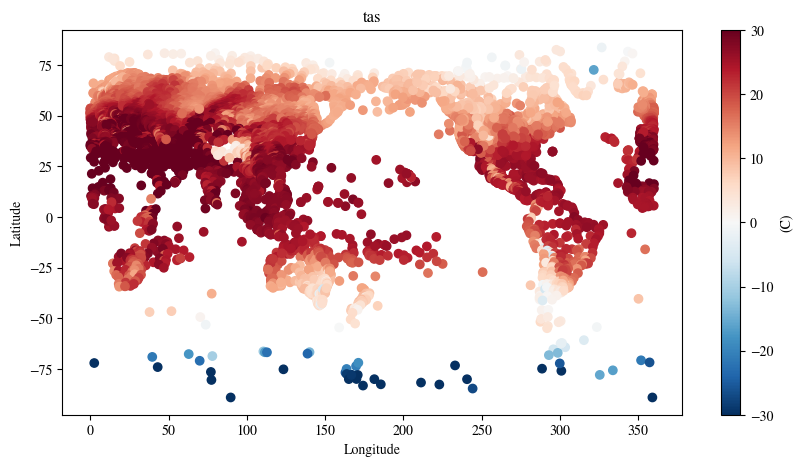

In [ ]:
fig = plt.figure(figsize=(10, 5))
plot_channel = 10
p = plt.scatter(
    data["downscaling"]["x_target"][0, 0, :].detach().cpu() * STATION_LON_LAT_SF,
    data["downscaling"]["x_target"][0, 1, :].detach().cpu() * STATION_LON_LAT_SF,
    c=station_forecast_unnorm[0, :],
    vmax=30,
    vmin=-30,
    cmap="RdBu_r",
)
cbar = fig.colorbar(p)
cbar.set_label("(C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"{local_forecast_var}")
plt.show()

# Train the Data Assimilation Block

This notebook is largely an adaption from the [script](https://github.com/anna-allen/aardvark-weather-public/blob/main/aardvark/train_module.py) used for training different blocks in the aardvark-weather model. We tailored it to specificly train the data assimilation block using the data in the year of 2007 from the **training data** released by the author in the [huggingface instance av555/aardvark-weather](https://huggingface.co/datasets/av555/aardvark-weather/tree/main/training_data)

Please note, this is only a demonstration of the protocal used in training the **data assimilation block** of the aardvark-weather model. 

In order to run this notebook, please rewrite the **training data** in the mmap format required by [the original dataloader](https://github.com/anna-allen/aardvark-weather-public/blob/main/aardvark/loader.py) and pass the path to the `WeatherDatasetAssimilation` class to replace `aardvark/datasets/`. If you need help to generate the mmap files, please get in touch.

In [ ]:
!module list

Currently Loaded Modulefiles:
 1) openmpi/4.1.5   2) singularity   3) NCI-ai-ml/25.07   4) pbs  
>

In [ ]:
import os, sys
import torch
#from torch.utils.data.distributed import DistributedSampler
from torch.utils.data import DataLoader
wdir="/g/data/dk92/notebooks/examples-aiml/aardvark-weather/aardvark-weather-public/aardvark"
sys.path.append(wdir)
from loader import *
from models import *
from loss_functions import WeightedRmseLoss

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    torch.cuda.set_device(0)

In [ ]:
# set up dataset
train_dataset = WeatherDatasetAssimilation(
            device=device,
            dpath="<replace with the path to the training data>",
            hadisd_mode="train",
            start_date="2007-01-02",
            end_date="2007-12-31",
            lead_time=0,
            era5_mode="4u",
            res=1,
            var_start=0,
            var_end=24,
            diff=False,
            two_frames=False,
        )

print(len(train_dataset))

Loading IGRA
Loading AMSU-A
Loading AMSU-B
Loading ICOADS
Loading IASI
Loading GEO
Loading HADISD
Loading ASCAT
Loading ERA5
1451


/opt/conda/envs/mlenv/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1746251337391/work/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
train_dataset.era5_sfc[0].shape, train_dataset.start_date

((1460, 24, 240, 121), '2007-01-02')

In [ ]:
# dive into the data structure used in the training sample.
task = train_dataset[0]
for k in task.keys():
    v = task[k]
    try:
        print(f"{k}: {v.shape}")
    except:
        if "_x_" in k:
            print(f"{k}: lat={v[1].shape}, lon={v[0].shape}")
        elif "hadisd" in k:
            print(f"{k}: ch1={v[0].shape}, ch2={v[1].shape}, ch3={v[2].shape}, ch4={v[3].shape}, ch5={v[4].shape}")

x_context_hadisd_current: ch1=torch.Size([2, 9549]), ch2=torch.Size([2, 9447]), ch3=torch.Size([2, 8846]), ch4=torch.Size([2, 9551]), ch5=torch.Size([2, 9551])
y_context_hadisd_current: ch1=torch.Size([9549]), ch2=torch.Size([9447]), ch3=torch.Size([8846]), ch4=torch.Size([9551]), ch5=torch.Size([9551])
climatology_current: torch.Size([24, 240, 121])
sat_x_current: lat=torch.Size([200]), lon=torch.Size([514])
sat_current: torch.Size([2, 514, 200])
icoads_x_current: lat=torch.Size([12000]), lon=torch.Size([12000])
icoads_current: torch.Size([5, 12000])
igra_x_current: lat=torch.Size([1375]), lon=torch.Size([1375])
igra_current: torch.Size([24, 1375])
amsua_current: torch.Size([180, 360, 13])
amsua_x_current: lat=torch.Size([180]), lon=torch.Size([360])
amsub_current: torch.Size([360, 180, 12])
amsub_x_current: lat=torch.Size([180]), lon=torch.Size([360])
iasi_current: torch.Size([360, 181, 52])
iasi_x_current: lat=torch.Size([181]), lon=torch.Size([360])
ascat_current: torch.Size([360, 

/g/data/dk92/notebooks/examples-aiml/aardvark-weather/aardvark-weather-public/aardvark/loader.py:488: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1746251337391/work/torch/csrc/utils/tensor_numpy.cpp:203.)
  return torch.from_numpy(arr).float().to(self.device)


In [ ]:
# set up dataloader
train_loader = DataLoader(
        train_dataset,
        batch_size=1,
        shuffle=False)
print(len(train_loader))

1451


In [ ]:
# init model
model = ConvCNPWeather(
            in_channels=277,
            out_channels=24,
            int_channels=24,
            device=device,
            res=1,
            gnp=bool(0),
            decoder="vit_assimilation",
            mode="assimilation",
            film=False,
            two_frames=False,
        )
model.decoder_lr = model.decoder_lr.to(device)

In [ ]:
# loss function
lf = WeightedRmseLoss(1,start_ind=0,end_ind=24,weight_per_variable=False)
lr=5e-4
wd=1e-6
opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

In [ ]:
# training loop
n_epochs=3
for epoch in range(n_epochs):
    acc_loss=0
    model.train()
    prev_step = None
    for ii, task in enumerate(train_loader):
        out = model(task,film_index=0)
        loss = lf(task["y_target"],out,prev_step,fix_sigma=False)
        loss.backward()
        prev_step = out
        opt.step()
        opt.zero_grad()
        acc_loss += loss.item()
        #print(f"epoch {epoch} step {ii}: loss={loss}")
        #if ii>= 8:
        #    break
    print(f"epoch {epoch}: average training loss={acc_loss/len(train_loader)}")

epoch 0: average training loss=0.07086729208491409
epoch 1: average training loss=0.058982408160714754
epoch 2: average training loss=0.05863337186925745
